In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
try:
    from probml_utils import savefig, latexify, is_latexify_enabled
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify, is_latexify_enabled

!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-2h6awkpc
  Running command git clone --filter=blob:none --quiet https://github.com/probml/probml-utils.git /tmp/pip-req-build-2h6awkpc
  Resolved https://github.com/probml/probml-utils.git to commit 536534e37cf8b03948e7ac5a5b5d8e62ef62057c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [3]:
%env FIG_DIR = latexed
%env LATEXIFY=1

env: FIG_DIR=latexed
env: LATEXIFY=1


In [4]:
latexify(fig_width = 8, fig_height = 2)

In [5]:
df = pd.read_csv("/content/dataset.csv")

In [6]:
df = df.drop(index=[23,55,4,9,52,44,45,33,43,20,1,50]).reset_index(drop=True)
df.head()

,Unnamed: 0,UID,gPEF,gFEV1,gFVC,Sex,Maneuver,Age,Height,Weight,Feel,Sick,Meal,Smoking,Lung Ailment,Past Spirometry,Incentive Given
0,0,P0,5.41,2.89,3.00,F,Tidal and FVC,22,159.0,59,Normal,No,No,No,No,No,Mask
1,2,P2,7.98,2.70,3.76,M,Tidal and FVC,28,170.0,108,Normal,No,No,Yes,No,No,Money and Mask
2,3,P3,5.96,2.77,2.96,M,Tidal and FVC,28,175.0,74,Normal,No,No,No,No,No,Mask
3,5,P5,4.39,2.96,3.19,M,Tidal and FVC,23,161.0,65,Normal,No,No,No,No,No,Mask
4,6,P6,5.40,2.96,3.45,M,Tidal and FVC,25,169.0,70,Normal,No,No,No,No,No,Mask


In [7]:
#@title Material Color
material = {
    "red": {
        0: "#ffebee",
        1: "#ffcdd2",
        2: "#ef9a9a",
        3: "#e57373",
        4: "#ef5350",
        5: "#f44336",
        6: "#e53935",
        7: "#d32f2f",
        8: "#c62828",
        9: "#b71c1c",
    },
    "pink": {
        0: "#fce4ec",
        1: "#f8bbd0",
        2: "#f48fb1",
        3: "#f06292",
        4: "#ec407a",
        5: "#e91e63",
        6: "#d81b60",
        7: "#c2185b",
        8: "#ad1457",
        9: "#880e4f",
    },
    "purple": {
        0: "#f3e5f5",
        1: "#e1bee7",
        2: "#ce93d8",
        3: "#ba68c8",
        4: "#ab47bc",
        5: "#9c27b0",
        6: "#8e24aa",
        7: "#7b1fa2",
        8: "#6a1b9a",
        9: "#4a148c",
    },
    "deep purple": {
        0: "#ede7f6",
        1: "#d1c4e9",
        2: "#b39ddb",
        3: "#9575cd",
        4: "#7e57c2",
        5: "#673ab7",
        6: "#5e35b1",
        7: "#512da8",
        8: "#4527a0",
        9: "#311b92",
    },
    "indigo": {
        0: "#e8eaf6",
        1: "#c5cae9",
        2: "#9fa8da",
        3: "#7986cb",
        4: "#5c6bc0",
        5: "#3f51b5",
        6: "#3949ab",
        7: "#303f9f",
        8: "#283593",
        9: "#1a237e",
    },
    "blue": {
        0: "#e3f2fd",
        1: "#bbdefb",
        2: "#90caf9",
        3: "#64b5f6",
        4: "#42a5f5",
        5: "#2196f3",
        6: "#1e88e5",
        7: "#1976d2",
        8: "#1565c0",
        9: "#0d47a1",
    },
    "light blue": {
        0: "#e1f5fe",
        1: "#b3e5fc",
        2: "#81d4fa",
        3: "#4fc3f7",
        4: "#29b6f6",
        5: "#03a9f4",
        6: "#039be5",
        7: "#0288d1",
        8: "#0277bd",
        9: "#01579b",
    },
    "cyan": {
        0: "#e0f7fa",
        1: "#b2ebf2",
        2: "#80deea",
        3: "#4dd0e1",
        4: "#26c6da",
        5: "#00bcd4",
        6: "#00acc1",
        7: "#0097a7",
        8: "#00838f",
        9: "#006064",
    },
    "teal": {
        0: "#e0f2f1",
        1: "#b2dfdb",
        2: "#80cbc4",
        3: "#4db6ac",
        4: "#26a69a",
        5: "#009688",
        6: "#00897b",
        7: "#00796b",
        8: "#00695c",
        9: "#004d40",
    },
    "green": {
        0: "#e8f5e9",
        1: "#c8e6c9",
        2: "#a5d6a7",
        3: "#81c784",
        4: "#66bb6a",
        5: "#4caf50",
        6: "#43a047",
        7: "#388e3c",
        8: "#2e7d32",
        9: "#1b5e20",
    },
    "light green": {
        0: "#f1f8e9",
        1: "#dcedc8",
        2: "#c5e1a5",
        3: "#aed581",
        4: "#9ccc65",
        5: "#8bc34a",
        6: "#7cb342",
        7: "#689f38",
        8: "#558b2f",
        9: "#33691e",
    },
    "lime": {
        0: "#f9fbe7",
        1: "#f0f4c3",
        2: "#e6ee9c",
        3: "#dce775",
        4: "#d4e157",
        5: "#cddc39",
        6: "#c0ca33",
        7: "#afb42b",
        8: "#9e9d24",
        9: "#827717",
    },
    "yellow": {
        0: "#fffde7",
        1: "#fff9c4",
        2: "#fff59d",
        3: "#fff176",
        4: "#ffee58",
        5: "#ffeb3b",
        6: "#fdd835",
        7: "#fbc02d",
        8: "#f9a825",
        9: "#f57f17",
    },
    "amber": {
        0: "#fff8e1",
        1: "#ffecb3",
        2: "#ffe082",
        3: "#ffd54f",
        4: "#ffca28",
        5: "#ffc107",
        6: "#ffb300",
        7: "#ffa000",
        8: "#ff8f00",
        9: "#ff6f00",
    },
    "orange": {
        0: "#fff3e0",
        1: "#ffe0b2",
        2: "#ffcc80",
        3: "#ffb74d",
        4: "#ffa726",
        5: "#ff9800",
        6: "#fb8c00",
        7: "#f57c00",
        8: "#ef6c00",
        9: "#e65100",
    },
    "deep orange": {
        0: "#fbe9e7",
        1: "#ffccbc",
        2: "#ffab91",
        3: "#ff8a65",
        4: "#ff7043",
        5: "#ff5722",
        6: "#f4511e",
        7: "#e64a19",
        8: "#d84315",
        9: "#bf360c",
    },
    "brown": {
        0: "#efebe9",
        1: "#d7ccc8",
        2: "#bcaaa4",
        3: "#a1887f",
        4: "#8d6e63",
        5: "#795548",
        6: "#6d4c41",
        7: "#5d4037",
        8: "#4e342e",
        9: "#3e2723",
    },
    "grey": {
        0: "#fafafa",
        1: "#f5f5f5",
        2: "#eeeeee",
        3: "#e0e0e0",
        4: "#bdbdbd",
        5: "#9e9e9e",
        6: "#757575",
        7: "#616161",
        8: "#424242",
        9: "#212121",
    },
    "blue grey": {
        0: "#eceff1",
        1: "#cfd8dc",
        2: "#b0bec5",
        3: "#90a4ae",
        4: "#78909c",
        5: "#607d8b",
        6: "#546e7a",
        7: "#455a64",
        8: "#37474f",
        9: "#263238",
    },
}

In [8]:
train = [30, 47, 15, 29, 35, 9, 24, 12]  
test = [45, 39, 8, 4, 20, 32, 25, 46, 42, 41]
pool = [i for i in range(0,48) if i not in train + test]

In [9]:
train=df.loc[train].copy()
train['Data Split'] = 'Train'
test=df.loc[test].copy()
test['Data Split'] = 'Test'
pool=df.loc[pool].copy()
pool['Data Split'] = 'Pool'
df_split = pd.concat([train, test, pool], ignore_index=True)
df_split = df_split.drop('Unnamed: 0', axis=1)

In [10]:
df_split.tail()

,UID,gPEF,gFEV1,gFVC,Sex,Maneuver,Age,Height,Weight,Feel,Sick,Meal,Smoking,Lung Ailment,Past Spirometry,Incentive Given,Data Split
43,P50,7.53,2.80,2.72,F,Tidal and FVC,25,163.0,45,Good,No,No,No,No,No,Yes. Cloth and N95 Mask,Pool
44,P51,8.42,2.40,2.72,F,Tidal and FVC,25,163.0,45,Good,No,No,No,No,No,Yes. Cloth and N95 Mask,Pool
45,P53,8.37,2.89,2.91,F,FVC only,25,165.1,55,Good,No,No,No,No,No,Yes. Cloth and N95 Mask,Pool
46,P58,6.68,2.71,3.11,F,FVC only,30,160.0,78,Okay,No,No,No,No,No,Yes. Cloth and N95 Mask,Pool
47,P60,7.77,3.39,3.42,M,FVC only,22,180.0,70,Normal,No,No,Yes,No,No,Yes. Cloth and N95 Mask,Pool


In [11]:
attributes = ['Height','Age','Weight']

/usr/local/lib/python3.8/dist-packages/probml_utils/plotting.py:70: UserWarning: renaming latexed/violin.pdf to latexed/violin_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to latexed/violin_latexified.pdf
Figure size: [8. 2.]


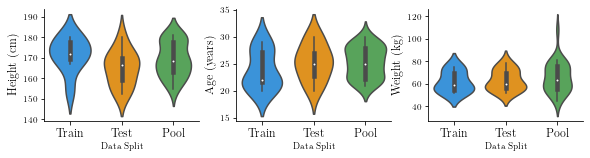

In [12]:
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()

# Plot a violin plot for each attribute
for i, attribute in enumerate(attributes):
    sns.violinplot(x='Data Split', y=attribute, data=df_split, ax=axs[i],palette={"Train": material['blue'][5], "Test": material['orange'][5], "Pool": material['green'][5]})
    y_label = " (cm)" if attribute == "Height" else " (kg)" if attribute == "Weight" else " (years)" if attribute == "Age" else " " 
    axs[i].set_ylabel(f"{attribute}{y_label}",fontsize = 12)
    axs[i].set_xticks([0, 1, 2])
    axs[i].set_xticklabels(["Train","Test","Pool"], fontsize=12)
    sns.despine()

# Show the plot

savefig("violin.pdf")
plt.show()